<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [3]:
df1 = pd.read_csv("IRAhandle_tweets_1.csv")
df2 = pd.read_csv("IRAhandle_tweets_2.csv")
df3 = pd.read_csv("IRAhandle_tweets_3.csv")
df4 = pd.read_csv("IRAhandle_tweets_4.csv")
df5 = pd.read_csv("IRAhandle_tweets_5.csv")
df6 = pd.read_csv("IRAhandle_tweets_6.csv")
df7 = pd.read_csv("IRAhandle_tweets_7.csv")
df8 = pd.read_csv("IRAhandle_tweets_8.csv")
df9 = pd.read_csv("IRAhandle_tweets_9.csv")

In [3]:
# checking dimension (num of rows and columns) of dataset
display(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape)

(381016, 15)

(397232, 15)

(368885, 15)

(388452, 15)

(331821, 15)

(324512, 15)

(365603, 15)

(378295, 15)

(37555, 15)

### Combine all datasets together

In [6]:
final = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9],ignore_index=True)
final.head(3)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll


<h2 style="color:blue" align="left"> 3. EDA </h2>

In [8]:
final.isnull().sum()

external_author_id          4
author                      0
content                     1
region                   8843
language                    0
publish_date                0
harvested_date              0
following                   0
followers                   0
updates                     0
post_type             1662425
account_type              363
new_june_2018               0
retweet                     0
account_category            0
dtype: int64

In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973371 entries, 0 to 2973370
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 340.3+ MB


### a. account_category

In [10]:
final['account_category'].nunique()

8

In [11]:
final['account_category'].value_counts()

NonEnglish      837725
RightTroll      719087
NewsFeed        599294
LeftTroll       427811
HashtagGamer    241827
Commercial      122582
Unknown          13905
Fearmonger       11140
Name: account_category, dtype: int64

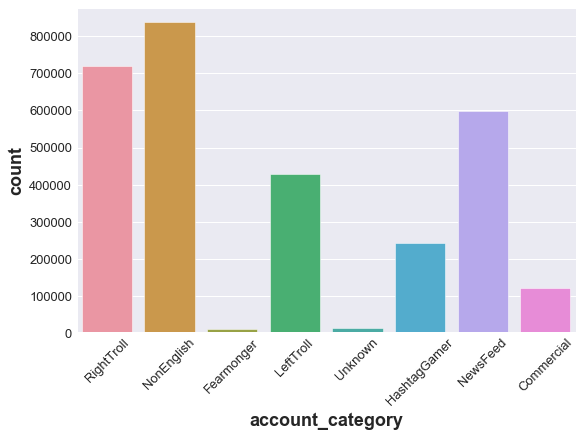

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(final['account_category'])
plt.xlabel("account_category", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.show()

### b. account_type

In [28]:
final['account_type'].nunique()

20

In [29]:
final['account_type'].value_counts()

Russian       721191
Right         718619
local         460197
left          427811
Hashtager     241827
news          139097
Commercial    122582
German         91851
Italian        15899
?              13542
Koch           10894
Arabic          6229
Spanish         1314
French          1117
right            468
ZAPOROSHIA       175
Portuguese       118
Ebola             71
Ukranian           4
Uzbek              2
Name: account_type, dtype: int64

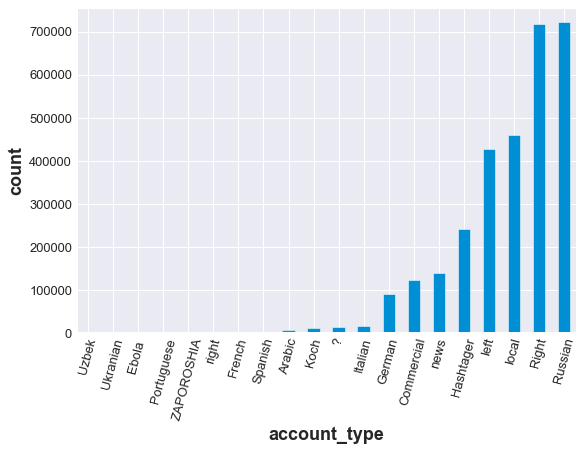

In [37]:
plt.figure(figsize=(8,6))
final['account_type'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("account_type", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=75)
plt.yticks(fontsize=13)
plt.show()

### c. post_type

In [38]:
final['post_type'].nunique()

2

In [39]:
final['post_type'].value_counts()

RETWEET        1270702
QUOTE_TWEET      40244
Name: post_type, dtype: int64

### d. region

In [40]:
final['region'].nunique()

36

In [41]:
final['region'].value_counts()

United States                2055882
Unknown                       572767
Azerbaijan                    100755
United Arab Emirates           74908
Russian Federation             37637
Belarus                        29619
Germany                        27192
United Kingdom                 18062
Italy                          13494
Iraq                           11219
Ukraine                         6272
Malaysia                        4933
Afghanistan                     4889
Israel                          3606
France                           942
Canada                           608
Iran, Islamic Republic of        541
Spain                            515
Egypt                            232
Japan                            110
Greece                            91
Saudi Arabia                      55
Sweden                            52
Mexico                            41
Samoa                             32
India                             22
Finland                           20
T

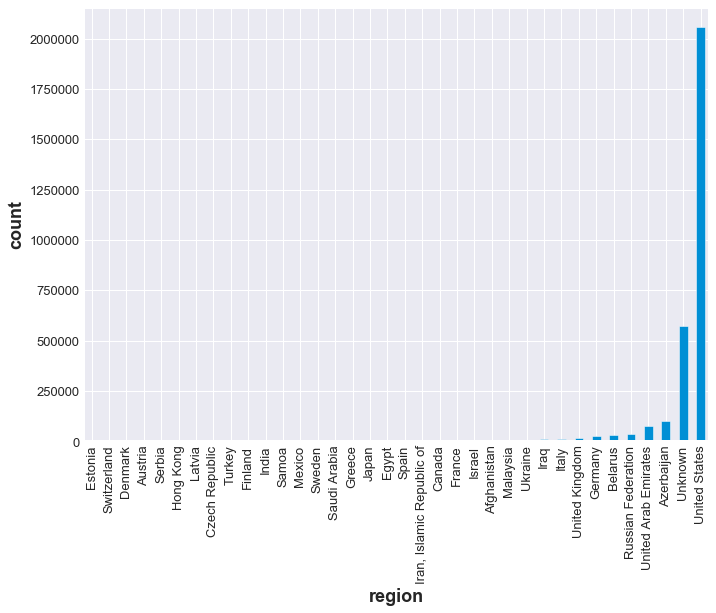

In [43]:
plt.figure(figsize=(10,8))
final['region'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("region", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.show()

### e. language

In [44]:
final['language'].nunique()

56

In [45]:
final['language'].value_counts()

English                2128963
Russian                 624124
German                   87171
Ukrainian                39361
Italian                  18254
Serbian                   9615
Uzbek                     9491
Bulgarian                 9458
LANGUAGE UNDEFINED        8325
Arabic                    7595
Macedonian                5260
French                    4572
Spanish                   3145
Norwegian                 2252
Farsi (Persian)           1685
Romanian                  1631
Dutch                     1167
Swedish                   1021
Vietnamese                 990
Estonian                   771
Japanese                   766
Catalan                    590
Finnish                    581
Albanian                   572
Croatian                   546
Icelandic                  499
Pushto                     488
Portuguese                 465
Turkish                    445
Lithuanian                 417
Polish                     386
Somali                     277
Slovak  

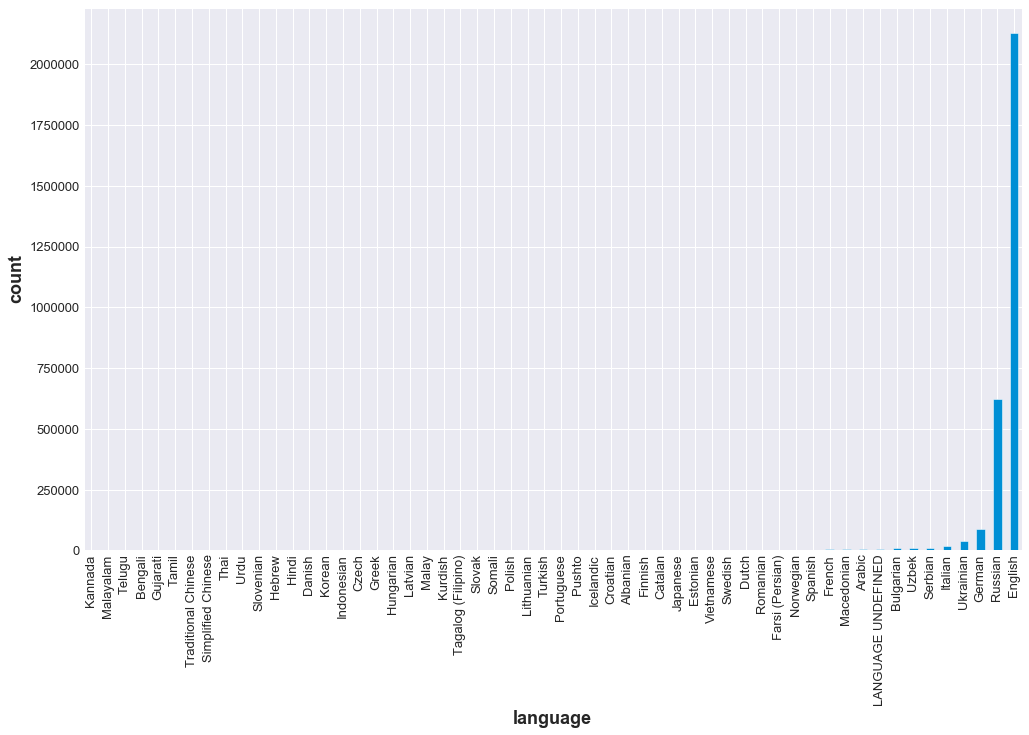

In [48]:
plt.figure(figsize=(15,10))
final['language'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel("language", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.show()